In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 
# im = io.imread('C:\\Users\\qSIM\\Pictures\\1.tif').astype(np.int8)           #('C:\\Users\\qSIM\\Pictures\\image_2022-08-18T19-43-13.341_0.tif')
# plt.imshow(im[1]-im[0],vmin=0,vmax=1)
# print(im)

(10, 1080, 1440)
(200, 200)


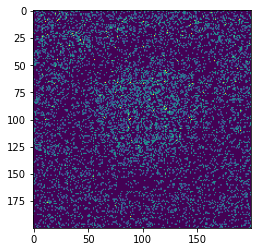

In [77]:
imcs=[]
im = io.imread('C:\\Users\\qSIM\\Pictures\\50.tif').astype(np.int8)
print(im.shape)
imc=im[1]-im[0]
imc[imc<0]=0
imcs=imc[475:675,510:710]
plt.imshow(imcs,vmin=0,vmax=2)
print(imcs.shape)

C:\Users\qSIM\AppData\Local\Temp/ipykernel_4132/4029013077.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(poly1d_p1(range(24)),'--k',color='green')


Text(0.5, 0, 'time (ms)')

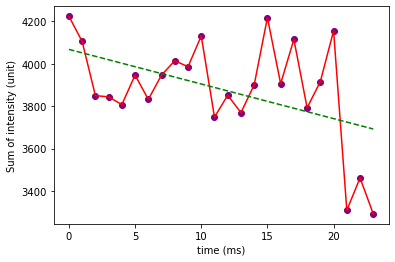

In [139]:
list_of_value_0=[]
list_of_array_value_0=[]
list_of_value_1=[]
list_of_array_value_1=[]

filelist = ['C:\\Users\\qSIM\\Pictures\\TOF_06_09\\25.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\50.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\75.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\100.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\125.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\150.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\175.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\200.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\225.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\250.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\275.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\300.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\325.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\350.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\375.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\400.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\425.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\450.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\475.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\500.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\525.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\550.tif'
            ,'C:\\Users\\qSIM\\Pictures\\TOF_06_09\\575.tif','C:\\Users\\qSIM\\Pictures\\TOF_06_09\\600.tif']
for imagefile in filelist:
    im = io.imread(imagefile).astype(np.int8)
    value=0
    for i in range(int(im.shape[0]/2)):
        imc=(im[(2*i)+1,475:675,510:710]-im[(2*i),475:675,510:710])
        imc[imc<0]=0
        value+=np.sum(imc)
    value/=int(im.shape[0]/2)
    list_of_value_0.append(value)
    
    array_value=np.zeros([200,200])
    for i in range(int(im.shape[0]/2)):
        imc=(im[(2*i)+1,475:675,510:710]-im[(2*i),475:675,510:710])
        # imc[imc<0]=0
        array_value+=imc
    list_of_array_value_0.append(array_value/int(im.shape[0]/2))
    array_value=np.zeros([200,200])
    
im2 = io.imread('C:\\Users\\qSIM\\Pictures\\TOF_06_09\\25-600.tif').astype(np.int8)
k=0
l=0
for i in range(24):
    value=0
    for j in range(5):
        imc=(im2[(2*k)+1,475:675,510:710]-im2[(2*k),475:675,510:710])
        imc[imc<0]=0
        value+=np.sum(imc)
        k+=1
    value/=int(im2.shape[0]/2)
    list_of_value_1.append(value)
    
    array_value=np.zeros([200,200])
    for j in range(5):
        imc=(im2[(2*l)+1,475:675,510:710]-im2[(2*l),475:675,510:710])
        array_value+=imc
        l+=1
    list_of_array_value_1.append(array_value/int(im2.shape[0]/2))
    
list_of_value = (np.array(list_of_value_0)+np.array(list_of_value_1))/2
list_of_array_value = (np.array(list_of_array_value_0)+np.array(list_of_array_value_1))/2

coefpoly1 = np.polyfit(range(24),list_of_value,1)
poly1d_p1 = np.poly1d(coefpoly1)
plt.plot(list_of_value,'o',color='purple')
plt.plot(list_of_value,color='red')
plt.plot(poly1d_p1(range(24)),'--k',color='green')
plt.ylabel('Sum of intensity (unit)')
plt.xlabel('time (ms)')

In [1]:
fig,(axs)=plt.subplots(4,6,figsize=(20,20))
k=0
for g in range(4):
    for p in range(6):
        axs[g,p].imshow(list_of_array_value[k],vmin=0,vmax=1)
        k+=1

NameError: name 'plt' is not defined

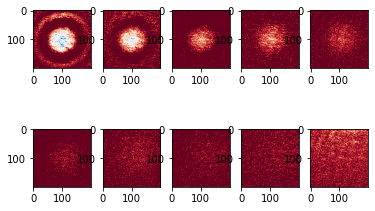

In [18]:
fig,(axs)=plt.subplots(2,5)
k=0
for g in range(2):
    for p in range(5):
        axs[g,p].imshow(list_of_array_value[k],cmap='RdBu',vmin=0,vmax=1)
        k+=1


In [52]:
sum_imx=np.sum(im[:,roi[0]:roi[1],roi[2]:roi[3]],axis=1)
sum_imy=np.sum(sum_imx,axis=1)
sum_imxy=sum_imy[1]-sum_imy[0]
print(sum_imxy)

43737


In [71]:
import glob
from skimage import io
file_list = glob.glob(
    r'C:\\Users\\nuttida_ka\\Desktop\\qsim\\MOT_loading_fluo\\absorbtion-imaging\\15-8-2022\\time-loading-10s\\*.*'
)
#print(file_list)
# Once all the paths are retrieved, read the images one by one in a loop.
my_list = []
for file in file_list:
    im = io.imread(file)
    my_list.append(im)
print(len(my_list))

15


In [73]:
abs_img=[]
for i in range(len(my_list)):
    sum_imx=np.sum(my_list[:,roi[0]:roi[1],roi[2]:roi[3]],axis=1)
    sum_imy=np.sum(sum_imx,axis=1)
    sum_imxy=sum_imy[1]-sum_imy[0]
print(sum_imxy)

TypeError: list indices must be integers or slices, not tuple